In [1]:
import sys
sys.path.append('../')
sys.path.append('../rlkit_master/')

import pickle
from rlkit_master.rlkit.samplers.rollout_functions import rollout
from rlkit_master.rlkit.envs.wrappers import NormalizedBoxEnv
import torch
import seaborn as sns
from gym.envs.mujoco import HalfCheetahEnv

from bokeh.plotting import figure, show, output_file
from bokeh.plotting import output_notebook
from bokeh.palettes import d3
import bokeh.models as bmo
from bokeh.client import push_session, pull_session

from bokeh.io import curdoc
from bokeh.layouts import row, column
from bokeh.models import CustomJS, Slider,TextInput
from bokeh.plotting import figure, show, ColumnDataSource

output_notebook()

import matplotlib.pyplot as plt
# import seaborn as sns

from scipy.fftpack import fft, fftfreq, fftshift
from scipy.stats import entropy
from skimage import util
import numpy as np
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import mean_squared_error
from math import sqrt
import copy
from pathlib import Path
eval_env = NormalizedBoxEnv(HalfCheetahEnv())

Loading BokehJS ...

In [2]:
dirs_w_epirements = ['../sac-fourier-hc/0-54f069ad/',
                    '../sac-fourier-hc/1-c34bcdf8/',
                    '../sac-fourier-hc/2-149be594/',
                    '../sac-fourier-hc/3-203072da/',
                    '../sac-fourier-hc/4-199d64ae/',
                    '../sac-fourier-hc/5-12f09f49/',
                    '../sac-fourier-hc/6-0b4775ca/',
                    '../sac-fourier-hc/7-82ff374d/',
                    '../sac-fourier-hc/8-76880ade/',
                    '../sac-fourier-hc/9-a717a945/',
                    '../rlkit_master/data/name-of-experiment/name-of-experiment_2019_11_22_14_30_29_0000--s-0/'
                    ]

In [3]:
def get_reward_from_epoch(exp_dir_name, epoch_num):
    agent = torch.load(f'{exp_dir_name}/itr_{epoch_num}.pkl',map_location='cpu')
    agent = agent['trainer/policy']

    rollout_dict = rollout(
    env = eval_env ,
    agent = agent,
    max_path_length=1000,
    render=False,
    render_kwargs=None,
        )
    
    return rollout_dict['rewards']

In [4]:
def get_reward_arr(exp_dir_name, max_steps = 2990):
    epoch_reward_sum = []
    for epoch_num in range(0,max_steps,10):
        if (np.mod(epoch_num,100) == 0):
            print("epoch num  = ", epoch_num)
        epoch_reward_sum.append(np.sum( get_reward_from_epoch(exp_dir_name, epoch_num)))
        
    return epoch_reward_sum


In [5]:
epoch_rewards_all = []
for j in range(10):
    for i in range(len(dirs_w_epirements)):
        epoch_reward = get_reward_arr(dirs_w_epirements[i])
        epoch_rewards_all.append(epoch_reward)

epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  230

epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  140

epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =

epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =

epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  170

epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  8

epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num

epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  2000
epoch num  =  2100
epoch num  =  2200
epoch num  =  2300
epoch num  =  2400
epoch num  =  2500
epoch num  =  2600
epoch num  =  2700
epoch num  =  2800
epoch num  =  2900
epoch num  =  0
epoch num  =  100
epoch num  =  200
epoch num  =  300
epoch num  =  400
epoch num  =  500
epoch num  =  600
epoch num  =  700
epoch num  =  800
epoch num  =  900
epoch num  =  1000
epoch num  =  1100
epoch num  =  1200
epoch num  =  1300
epoch num  =  1400
epoch num  =  1500
epoch num  =  1600
epoch num  =  1700
epoch num  =  1800
epoch num  =  1900
epoch num  =  200

In [6]:
# plt.figure(figsize=(16, 6))
# ax = sns.lineplot(x=[i*10 for i in range(len(epoch_reward_sum))], y=epoch_reward_sum)
# plt.xlabel('epoch')
# plt.ylabel('summarised reward by episode')
# plt.show()

NameError: name 'epoch_reward_sum' is not defined

<Figure size 1152x432 with 0 Axes>

In [7]:
def plot_scores(scores, title, ymin=0, ymax=15000, xmin=0, xmax=3000, x_step = 10,
                min_percentile=2.5, max_percemtile=97.5,
               x_label = 'frequancy step',
               y_label = 'Fourier transform'):
    plt.figure(figsize=[10, 5])
    pal = sns.color_palette()
    scores = np.array(scores)
    idx = [i*x_step for i in range(np.shape(scores)[1])]
    l1, = plt.plot(idx, np.mean(scores, axis=0), color=pal[2])
#     print(np.mean(scores, axis=0))
    l2 = plt.fill_between(idx, np.percentile(scores, min_percentile, axis=0), np.percentile(scores, max_percemtile, axis=0), color=pal[0], alpha=0.5)
    plt.title(title,size =15)
    plt.xlabel(x_label,size = 15)
    plt.ylabel(y_label,size = 15)
    plt.ylim([ymin, ymax])
    plt.xlim([xmin, xmax])
    plt.legend([l1, l2], ['Mean', '95% interval'], loc=4)

In [9]:
np.shape(epoch_rewards_all)

(110, 299)

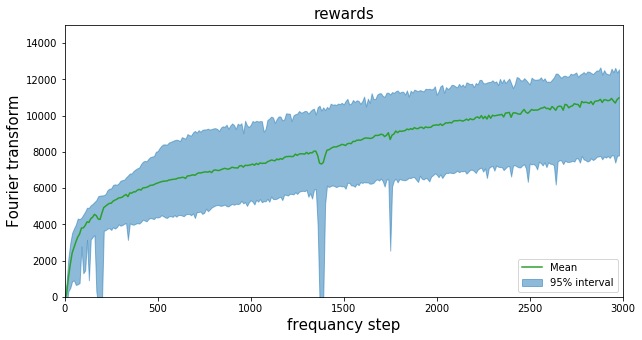

In [8]:
plot_scores(epoch_rewards_all, title= 'rewards')

In [100]:

dicts_dir = 'dicts_w_rollouts/rolloutsa_base/'
dicts_epx_names = ['base_run_1-c34bcdf8.pkl']

In [101]:
import os
os.remove('dicts_w_rollouts/rolloutsa_base/ифыу_кгт_1_0-54f069ad.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'dicts_w_rollouts/rolloutsa_base/ифыу_кгт_1_0-54f069ad.pkl'

In [102]:
for path in Path(dicts_dir).iterdir():
    print(path)

dicts_w_rollouts/rolloutsa_base/base_run_3-203072da.pkl
dicts_w_rollouts/rolloutsa_base/base_run_2-149be594.pkl
dicts_w_rollouts/rolloutsa_base/base_run_1_0-54f069ad.pkl
dicts_w_rollouts/rolloutsa_base/base_2019_11_22_14_30_29_0000--s-0.pkl
dicts_w_rollouts/rolloutsa_base/base_run_5-12f09f49.pkl
dicts_w_rollouts/rolloutsa_base/base_run_1-c34bcdf8.pkl
dicts_w_rollouts/rolloutsa_base/entropy_2020_05_01_12_16_57_0000--s-0.pkl
dicts_w_rollouts/rolloutsa_base/base_run_4-199d64ae.pkl


In [103]:
# Plot sliders for FOurier Spectrum per action per epoch

x1 = 0
x2 = 41
x = np.arange(x1,x2)

# x = np.linspace(0, 10, 500)
max_steps = 2990
# max_steps = 20
# y_dict ={}
# for act in range(6):
#     for epoch in range(0,max_steps,10):
#         y_dict[f'{act}_{epoch}'] = get_action_mean_ft_spectrum_from_epoch(act,epoch)
with open('dicts_w_rollouts/rolloutsa_base/base_run_1-c34bcdf8.pkl', 'rb') as handle:
    y_dict = pickle.load(handle)
y_dict["y"] = y_dict['0_0']

y_dict['x'] = x

source = ColumnDataSource(data= y_dict)

plot = figure(y_range=(-0.1, 3), plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

epoch_slider = Slider(start=0, end=max_steps+1, value=0, step=10, title="Epoch")
act_num_slider = Slider(start=0, end=5, value=1, step=1, title="Act_num")
# phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
# offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, epoch=epoch_slider,act_num = act_num_slider),
                    code="""
    const data = source.data;
    const A = act_num.value;
    const E = epoch.value;
    const x = data['x'];
    const y = data[A.toString().concat('_',E.toString())];
    data['y'] = y;
    
    
    source.change.emit();
""")

epoch_slider.js_on_change('value', callback)
act_num_slider.js_on_change('value', callback)
# phase_slider.js_on_change('value', callback)
# offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(epoch_slider, act_num_slider),
)

# output_file("slider.html", title="slider.py example")

show(layout)

In [104]:
y_dict['0_0']

array([2.56168   , 1.6294788 , 0.16161525, 0.5404305 , 0.14591552,
       0.3242666 , 0.1811487 , 0.27353585, 0.14662127, 0.21951614,
       0.17133963, 0.2023973 , 0.189133  , 0.20168442, 0.1740131 ,
       0.19263959, 0.15153526, 0.16451752, 0.15529849, 0.17431198,
       0.17988043, 0.16888489, 0.16103868, 0.17486268, 0.1597858 ,
       0.14757371, 0.14619021, 0.16478235, 0.16616572, 0.1831558 ,
       0.177893  , 0.16375941, 0.15934671, 0.18436795, 0.16637017,
       0.17986763, 0.1894434 , 0.17342256, 0.17133938, 0.14441809,
       0.20978104], dtype=float32)

In [105]:
np.shape(epoch_rewards_all)

(11, 299)

In [148]:
y_dict_all = None
for path in Path(dicts_dir).iterdir():
    print(path)
    if 'entropy' in str(path):
        continue
    with open(path, 'rb') as handle:
        y_dict = pickle.load(handle)
    if not y_dict_all:
        y_dict_all= {}
        for key,value in y_dict.items():
            y_dict_all[key] = [list(value)]
    
    else:
        for key,value in y_dict.items():
            y_dict_all[key].append(list(y_dict[key]))
        

dicts_w_rollouts/rolloutsa_base/base_run_3-203072da.pkl
dicts_w_rollouts/rolloutsa_base/base_run_2-149be594.pkl
dicts_w_rollouts/rolloutsa_base/base_run_1_0-54f069ad.pkl
dicts_w_rollouts/rolloutsa_base/base_2019_11_22_14_30_29_0000--s-0.pkl
dicts_w_rollouts/rolloutsa_base/base_run_8-76880ade.pkl
dicts_w_rollouts/rolloutsa_base/base_run_5-12f09f49.pkl
dicts_w_rollouts/rolloutsa_base/base_run_6-0b4775ca.pkl
dicts_w_rollouts/rolloutsa_base/base_run_1-c34bcdf8.pkl
dicts_w_rollouts/rolloutsa_base/entropy_2020_05_01_12_16_57_0000--s-0.pkl
dicts_w_rollouts/rolloutsa_base/base_run_9-a717a945.pkl
dicts_w_rollouts/rolloutsa_base/base_run_4-199d64ae.pkl
dicts_w_rollouts/rolloutsa_base/base_run_7-82ff374d.pkl


In [149]:
np.shape(y_dict_all['0_0'])

(11, 41)

In [150]:
# epoch_rewards_all

In [151]:
(y_dict_all["4_2980"])

[[0.35560605,
  0.21282887,
  0.20681398,
  0.16185121,
  0.21251018,
  0.18738244,
  0.22379085,
  0.1913312,
  0.310717,
  0.3390122,
  0.8438251,
  1.069948,
  0.6833249,
  0.36868095,
  0.26123717,
  0.20840265,
  0.18516704,
  0.18489665,
  0.2262299,
  0.2750141,
  0.29661834,
  0.27248374,
  0.2730764,
  0.22011973,
  0.18545075,
  0.20996028,
  0.21828777,
  0.23058209,
  0.23922653,
  0.25028473,
  0.27120638,
  0.24479075,
  0.24331434,
  0.23253743,
  0.2339914,
  0.22058642,
  0.20318025,
  0.16851409,
  0.19811982,
  0.17051242,
  0.24359937],
 [0.92893285,
  0.6105619,
  0.1884198,
  0.23474418,
  0.18830563,
  0.18665908,
  0.21018356,
  0.17908084,
  0.22132038,
  0.21071765,
  0.3005244,
  0.35331088,
  0.9607042,
  1.0247265,
  0.47797427,
  0.4023169,
  0.3021538,
  0.23882419,
  0.21144386,
  0.1888712,
  0.16575849,
  0.16467561,
  0.18451178,
  0.19899651,
  0.28717655,
  0.41622195,
  0.4838688,
  0.4025457,
  0.3028598,
  0.20571479,
  0.21814874,
  0.20104983,


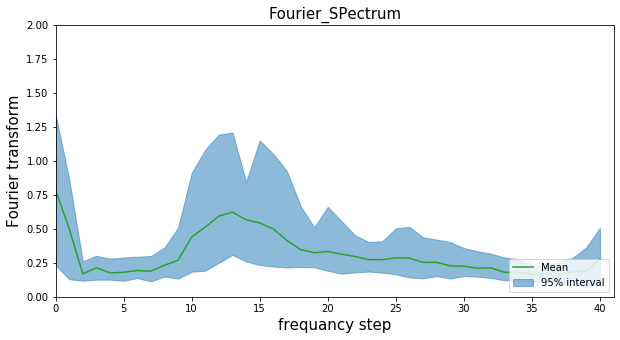

In [152]:
plot_scores((y_dict_all["0_1500"]), ymax=2, xmin=0, xmax=41,title= 'Fourier_SPectrum',x_step =1)

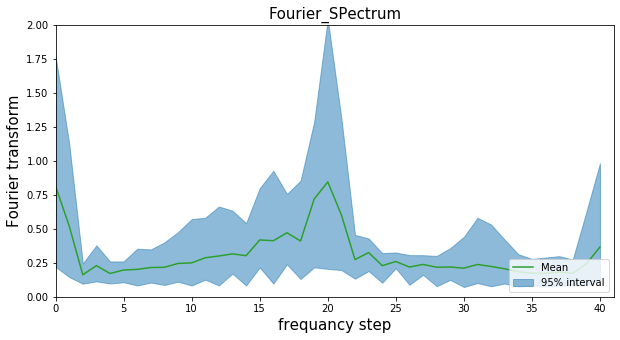

In [156]:
plot_scores((y_dict_all["0_300"]), ymax=2, xmin=0, xmax=41,title= 'Fourier_SPectrum',x_step =1)

In [95]:
# Plot sliders for FOurier Spectrum per action per epoch

x1 = 0
x2 = 41
x = np.arange(x1,x2)

# x = np.linspace(0, 10, 500)
max_steps = 2990
# max_steps = 20
# y_dict ={}
# for act in range(6):
#     for epoch in range(0,max_steps,10):
#         y_dict[f'{act}_{epoch}'] = get_action_mean_ft_spectrum_from_epoch(act,epoch)
with open('dicts_w_rollouts/rolloutsa_base/base_run_1-c34bcdf8.pkl', 'rb') as handle:
    y_dict = pickle.load(handle)
y_dict["y"] = y_dict['0_0']

y_dict['x'] = x

source = ColumnDataSource(data= y_dict)

plot = figure(y_range=(-0.1, 3), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

epoch_slider = Slider(start=0, end=max_steps+1, value=0, step=10, title="Epoch")
act_num_slider = Slider(start=0, end=5, value=1, step=1, title="Act_num")
# phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
# offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, epoch=epoch_slider,act_num = act_num_slider),
                    code="""
    const data = source.data;
    const A = act_num.value;
    const E = epoch.value;
    const x = data['x'];
    const y = data[A.toString().concat('_',E.toString())];
    data['y'] = y;
    
    
    source.change.emit();
""")

epoch_slider.js_on_change('value', callback)
act_num_slider.js_on_change('value', callback)
# phase_slider.js_on_change('value', callback)
# offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(epoch_slider, act_num_slider),
)

# output_file("slider.html", title="slider.py example")

show(layout)

In [163]:
periods_all= {}
for path in Path(dicts_dir).iterdir():
    print(path)
    if 'entropy' in str(path):
        continue
    with open(path, 'rb') as handle:
        y_dict = pickle.load(handle)
    
    for act in range(6):
        act_period = []
        for epoch in range(0,max_steps,10):
            act_period.append(80/max(np.argmax(y_dict[f'{act}_{epoch}']),1))
            
        if act not in  periods_all:
            
            periods_all[act] = [act_period]
    
        else:
            periods_all[act].append(act_period)


# preiods = {}
# for act in range(6):
#     act_period = []
#     for epoch in range(0,max_steps,10):
# #         act_period.append(80/max(np.argmax(y_dict[f'{act}_{epoch}']),1))
#         act_period.append(80/max(np.argmax(y_dict[f'{act}_{epoch}']),1))
    
#     preiods[f'{act}'] = act_period
# preiods["y"] = preiods['0']

# preiods['x'] = [i for i  in range(0,max_steps,10)]

dicts_w_rollouts/rolloutsa_base/base_run_3-203072da.pkl
dicts_w_rollouts/rolloutsa_base/base_run_2-149be594.pkl
dicts_w_rollouts/rolloutsa_base/base_run_1_0-54f069ad.pkl
dicts_w_rollouts/rolloutsa_base/base_2019_11_22_14_30_29_0000--s-0.pkl
dicts_w_rollouts/rolloutsa_base/base_run_8-76880ade.pkl
dicts_w_rollouts/rolloutsa_base/base_run_5-12f09f49.pkl
dicts_w_rollouts/rolloutsa_base/base_run_6-0b4775ca.pkl
dicts_w_rollouts/rolloutsa_base/base_run_1-c34bcdf8.pkl
dicts_w_rollouts/rolloutsa_base/entropy_2020_05_01_12_16_57_0000--s-0.pkl
dicts_w_rollouts/rolloutsa_base/base_run_9-a717a945.pkl
dicts_w_rollouts/rolloutsa_base/base_run_4-199d64ae.pkl
dicts_w_rollouts/rolloutsa_base/base_run_7-82ff374d.pkl


In [171]:
np.shape(periods_all[0][1])


(299,)

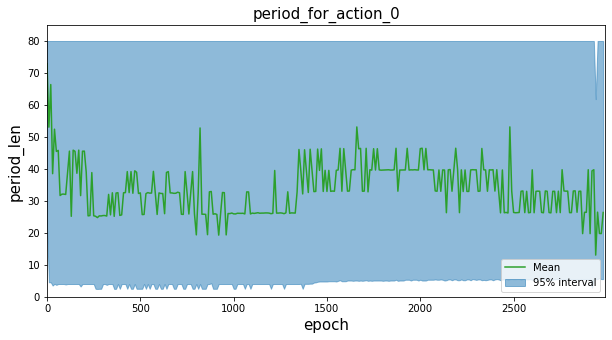

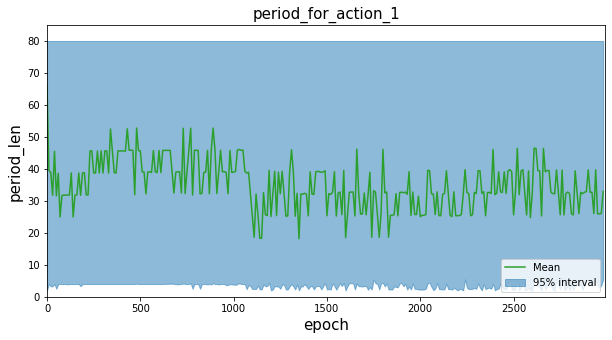

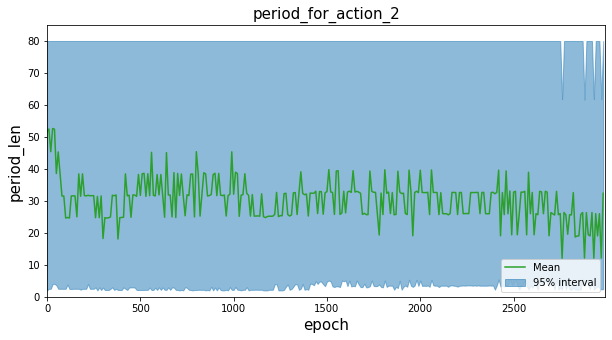

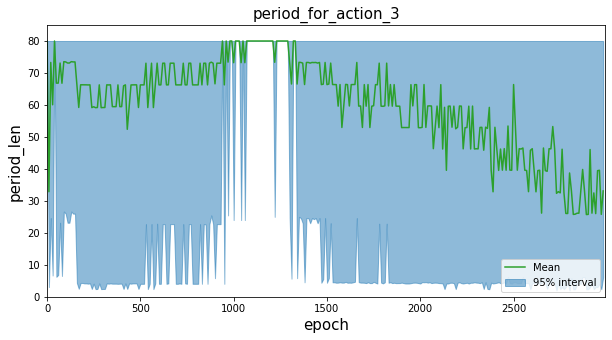

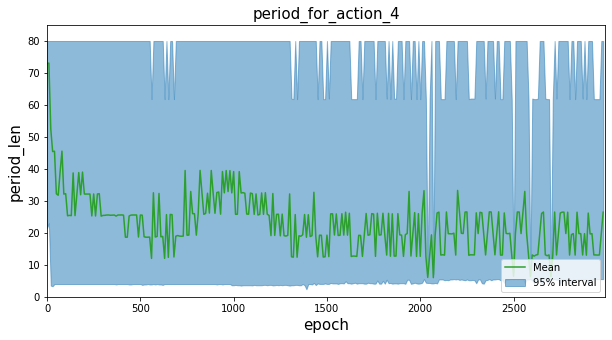

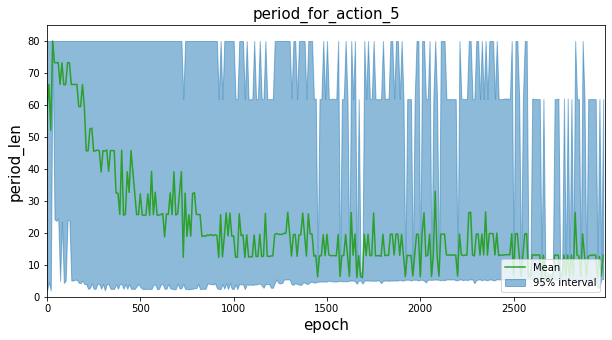

In [192]:
for act in range(6):
    plot_scores((periods_all[act]), ymax=85, xmin=0, xmax=2990,title= f'period_for_action_{act}',x_step =10,
               x_label = 'epoch', y_label = 'period_len')

In [216]:
from sklearn.preprocessing import MinMaxScaler

max_pick_all = {}
for path in Path(dicts_dir).iterdir():
    print(path)
    if 'entropy' in str(path):
        continue
    with open(path, 'rb') as handle:
        y_dict = pickle.load(handle)

    for act in range(6):
        act_period_max = []
        act_period_entropy = []
        for epoch in range(0,max_steps,10):
            scaler = MinMaxScaler()
            act_period_entropy.append(entropy( scaler.fit_transform(np.array(y_dict[f'{act}_{epoch}']).reshape(-1,1)))[0])
       
        if act not in  max_pick_all:
            max_pick_all[act] = [act_period_entropy]
    
        else:

            
            max_pick_all[act].append(act_period_entropy)

# # Entropy (CUrrently wo normalization)
# max_pick = {}
# for act in range(6):
#     act_period_max = []
#     act_period_entropy = []
#     for epoch in range(0,max_steps,10):
#         scaler = MinMaxScaler()
# #         act_period_max.append(np.max( y_dict[f'{act}_{epoch}']))
# #         print((np.array(y_dict[f'{act}_{epoch}']).reshape(1,-1)))    
# #         print(scaler.fit_transform(np.array(y_dict[f'{act}_{epoch}']).reshape(-1,1)))
#         act_period_entropy.append(entropy( scaler.fit_transform(np.array(y_dict[f'{act}_{epoch}']).reshape(-1,1))))
    
#     max_pick[f'{act}'] = act_period_entropy

dicts_w_rollouts/rolloutsa_base/base_run_3-203072da.pkl
dicts_w_rollouts/rolloutsa_base/base_run_2-149be594.pkl
dicts_w_rollouts/rolloutsa_base/base_run_1_0-54f069ad.pkl
dicts_w_rollouts/rolloutsa_base/base_2019_11_22_14_30_29_0000--s-0.pkl
dicts_w_rollouts/rolloutsa_base/base_run_8-76880ade.pkl
dicts_w_rollouts/rolloutsa_base/base_run_5-12f09f49.pkl
dicts_w_rollouts/rolloutsa_base/base_run_6-0b4775ca.pkl
dicts_w_rollouts/rolloutsa_base/base_run_1-c34bcdf8.pkl
dicts_w_rollouts/rolloutsa_base/entropy_2020_05_01_12_16_57_0000--s-0.pkl
dicts_w_rollouts/rolloutsa_base/base_run_9-a717a945.pkl
dicts_w_rollouts/rolloutsa_base/base_run_4-199d64ae.pkl
dicts_w_rollouts/rolloutsa_base/base_run_7-82ff374d.pkl


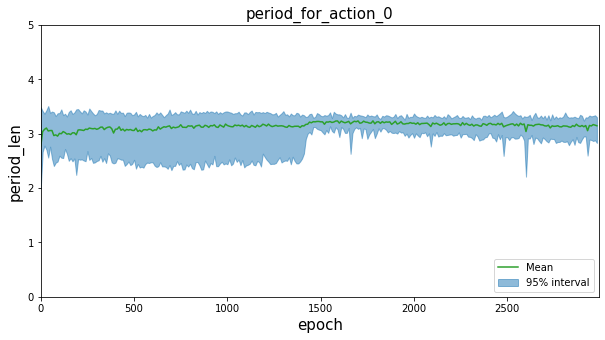

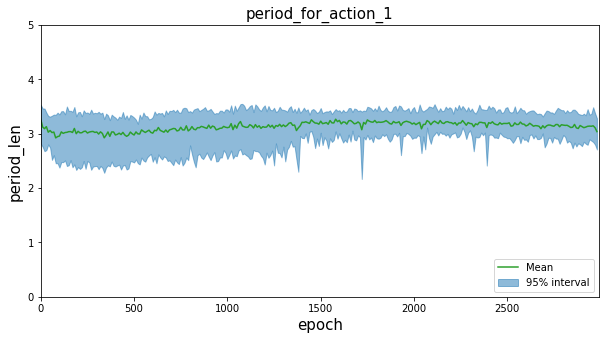

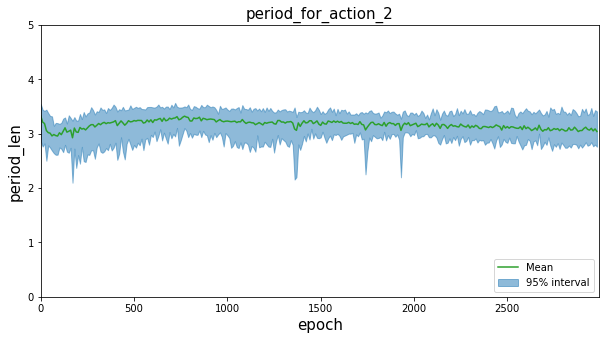

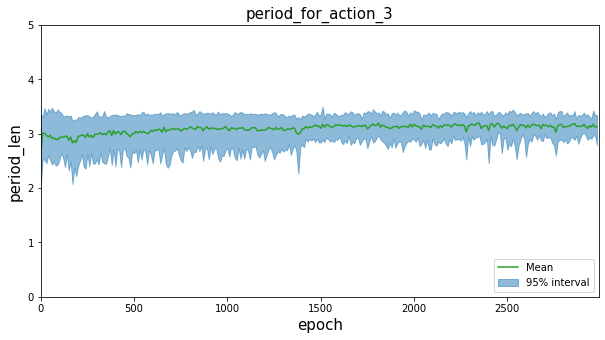

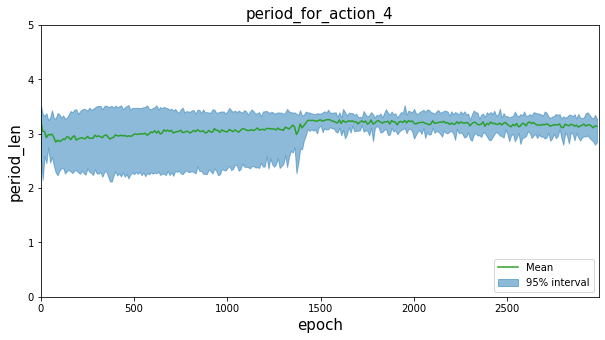

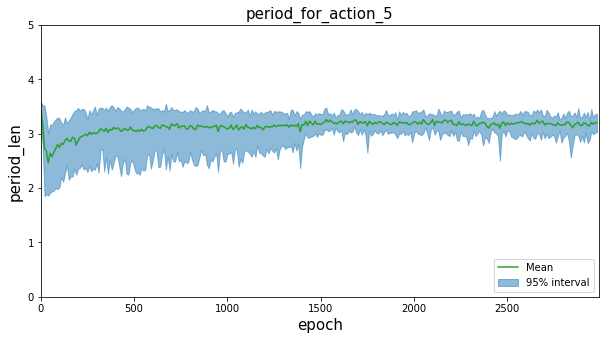

In [218]:
for act in range(6):
    plot_scores((max_pick_all[act]), ymax=5, xmin=0, xmax=2990,title= f'period_for_action_{act}',x_step =10,
               x_label = 'epoch', y_label = 'period_len')

In [217]:
np.shape(max_pick_all[0])

(11, 299)

In [215]:
max_pick_all[0]

[[array([3.4705837], dtype=float32),
  array([3.0183587], dtype=float32),
  array([3.3804166], dtype=float32),
  array([3.4734817], dtype=float32),
  array([3.5238101], dtype=float32),
  array([3.4010813], dtype=float32),
  array([3.385919], dtype=float32),
  array([3.3684719], dtype=float32),
  array([3.2968702], dtype=float32),
  array([3.3779054], dtype=float32),
  array([3.367121], dtype=float32),
  array([3.4722176], dtype=float32),
  array([3.2448246], dtype=float32),
  array([3.2595265], dtype=float32),
  array([3.3195634], dtype=float32),
  array([3.328704], dtype=float32),
  array([3.410179], dtype=float32),
  array([3.300187], dtype=float32),
  array([3.167426], dtype=float32),
  array([3.1969604], dtype=float32),
  array([3.356191], dtype=float32),
  array([3.376983], dtype=float32),
  array([3.3393314], dtype=float32),
  array([3.2974932], dtype=float32),
  array([3.332805], dtype=float32),
  array([3.314997], dtype=float32),
  array([3.3519478], dtype=float32),
  array([3.